In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**Add dataframe**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CapstoneVeriV3.csv',delimiter=";") 
df.head() #First 5 line from data


,Cement,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,185.7,101.5,166.9,7.5,1006.4,905.4,90,38.28
1,170.7,127.4,161.8,7.8,1090.0,798.5,3,17.11
2,180.7,127.4,166.1,7.8,1090.0,798.6,14,23.34
3,160.7,127.4,162.1,7.8,1090.0,804.0,28,27.41
4,242.1,125.6,184.3,5.7,1057.6,779.3,14,21.91


**Data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            368 non-null    float64
 1   FlyAsh            368 non-null    float64
 2   Water             368 non-null    float64
 3   Superplasticizer  368 non-null    float64
 4   CoarseAggregate   368 non-null    float64
 5   FineAggregate     368 non-null    float64
 6   Age               368 non-null    int64  
 7   Strength          368 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.1 KB


In [ ]:
df.isnull().sum() #null check

Cement              0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Strength            0
dtype: int64

**Examining the data distribution**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,368.0,329.424185,94.890475,136.10,275.100,311.250,376.000,540.00
FlyAsh,368.0,53.646196,59.467745,0.00,0.000,0.000,124.425,168.30
Water,368.0,182.695380,19.130836,140.00,169.975,186.000,192.000,228.00
Superplasticizer,368.0,4.382337,5.808848,0.00,0.000,0.000,9.500,28.20
CoarseAggregate,368.0,998.323913,75.760593,801.00,956.450,994.600,1053.950,1125.00
FineAggregate,368.0,778.994293,81.597854,77.60,754.225,784.000,822.050,905.40
Age,368.0,48.111413,67.367115,1.00,7.000,28.000,56.000,365.00
Strength,368.0,34.660272,14.681839,6.27,23.210,33.655,42.485,79.99


In [ ]:
df.drop_duplicates(inplace=True) #Duplicate value check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

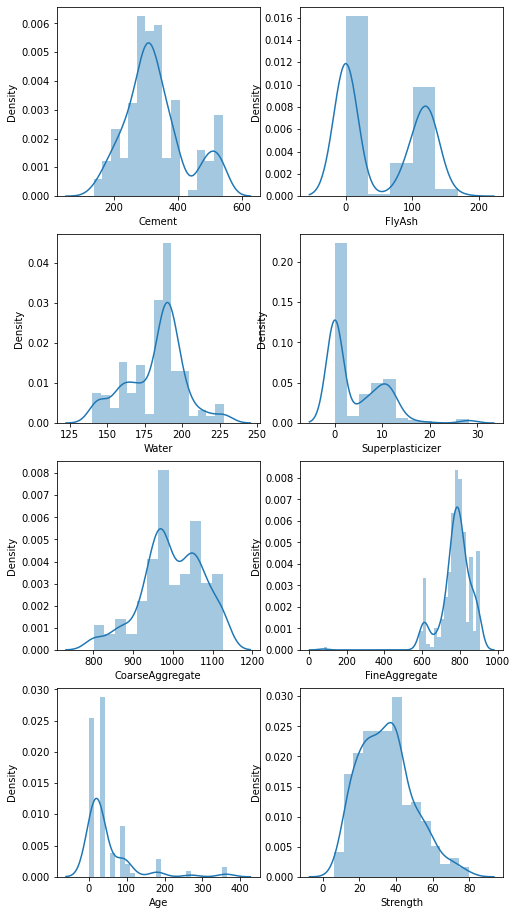

In [ ]:
fig, ax2 = plt.subplots(4, 2, figsize=(8, 16))
sb.distplot(df['Cement'],ax=ax2[0][0])
sb.distplot(df['FlyAsh'],ax=ax2[0][1])
sb.distplot(df['Water'],ax=ax2[1][0])
sb.distplot(df['Superplasticizer'],ax=ax2[1][1])
sb.distplot(df['CoarseAggregate'],ax=ax2[2][0])
sb.distplot(df['FineAggregate'],ax=ax2[2][1])
sb.distplot(df['Age'],ax=ax2[3][0])
sb.distplot(df['Strength'],ax=ax2[3][1])


**Correlation**

In [ ]:
df_corr=df.corr()

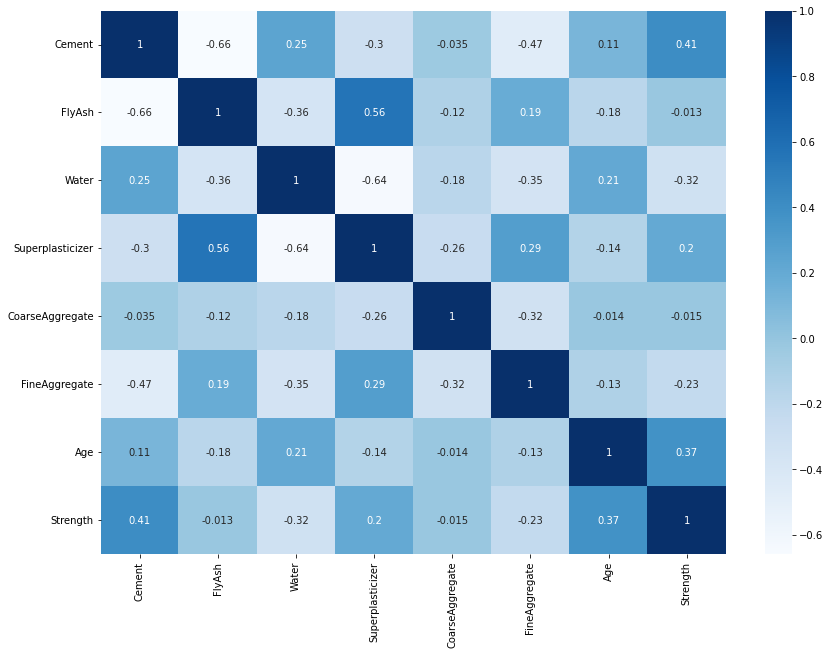

In [ ]:
plt.figure(figsize=(14,10))
sb.heatmap(df_corr, annot=True, cmap='Blues')
plt.show()

**Outlier detection and fixing**

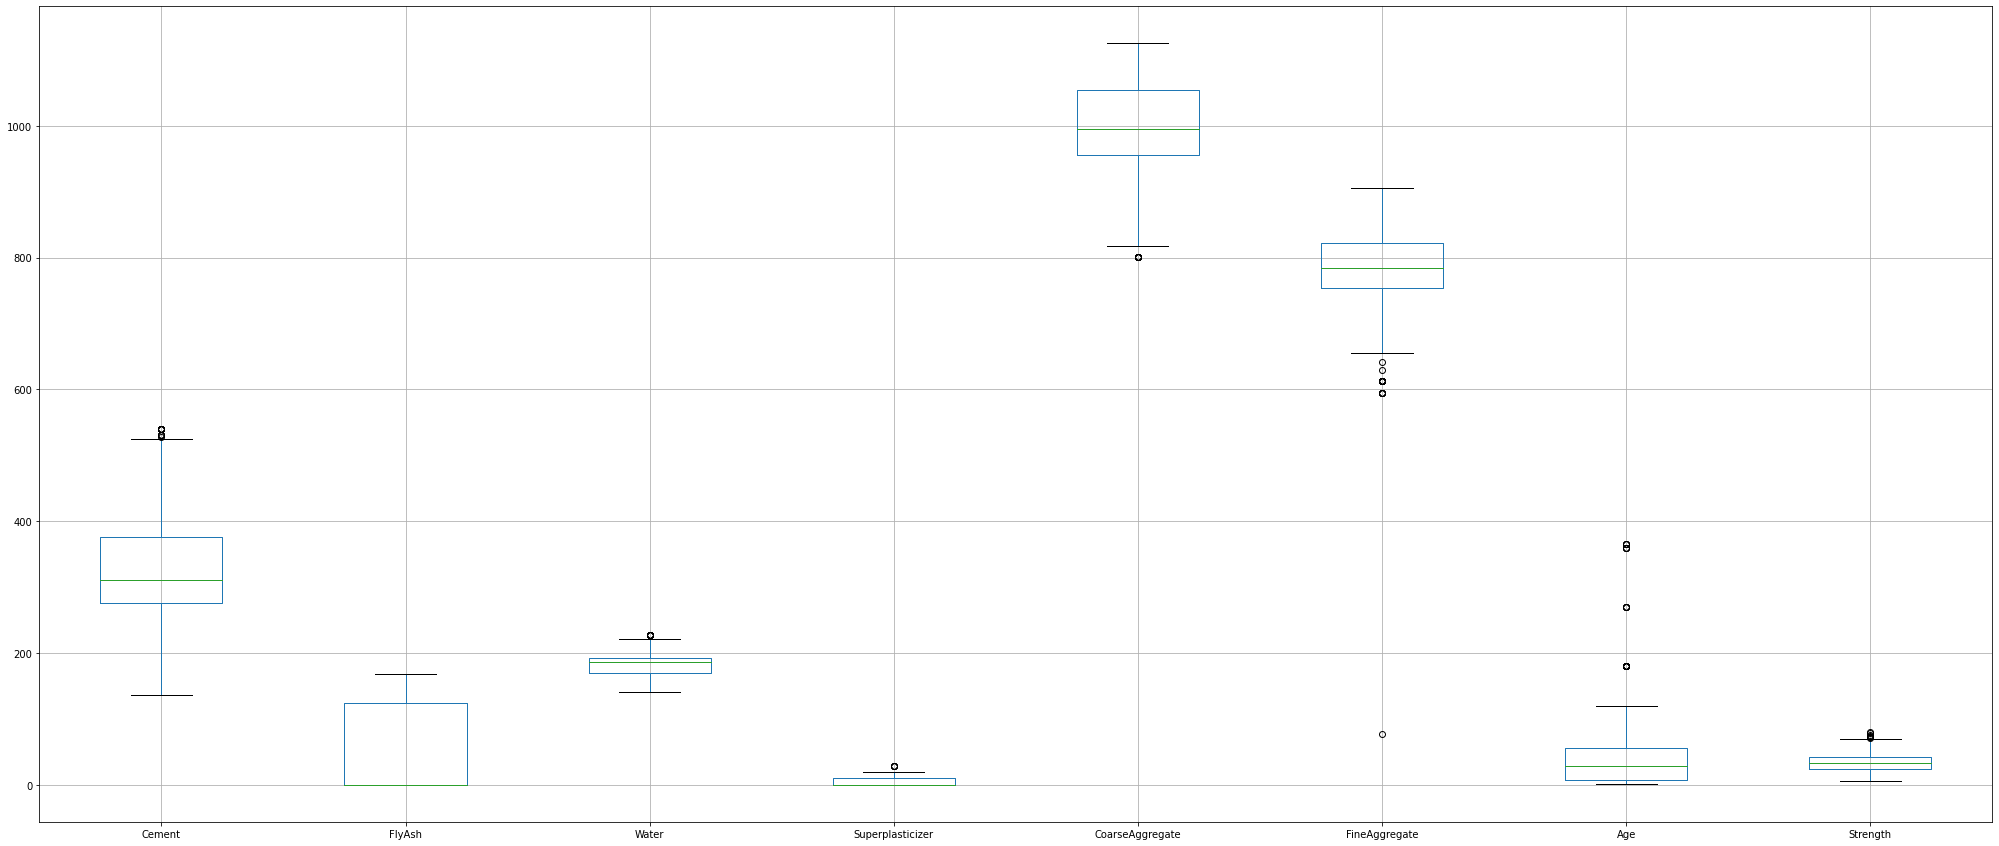

In [ ]:
data_model=df.copy()
data_model.boxplot(figsize=(35,15))

**Quantile method and fixing with median value**

In [ ]:
for col_name in data_model.columns[:-1]:
    q1 = data_model[col_name].quantile(0.25)
    q3 = data_model[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    data_model.loc[(data_model[col_name] < low) | (data_model[col_name] > high), col_name] = data_model[col_name].median()

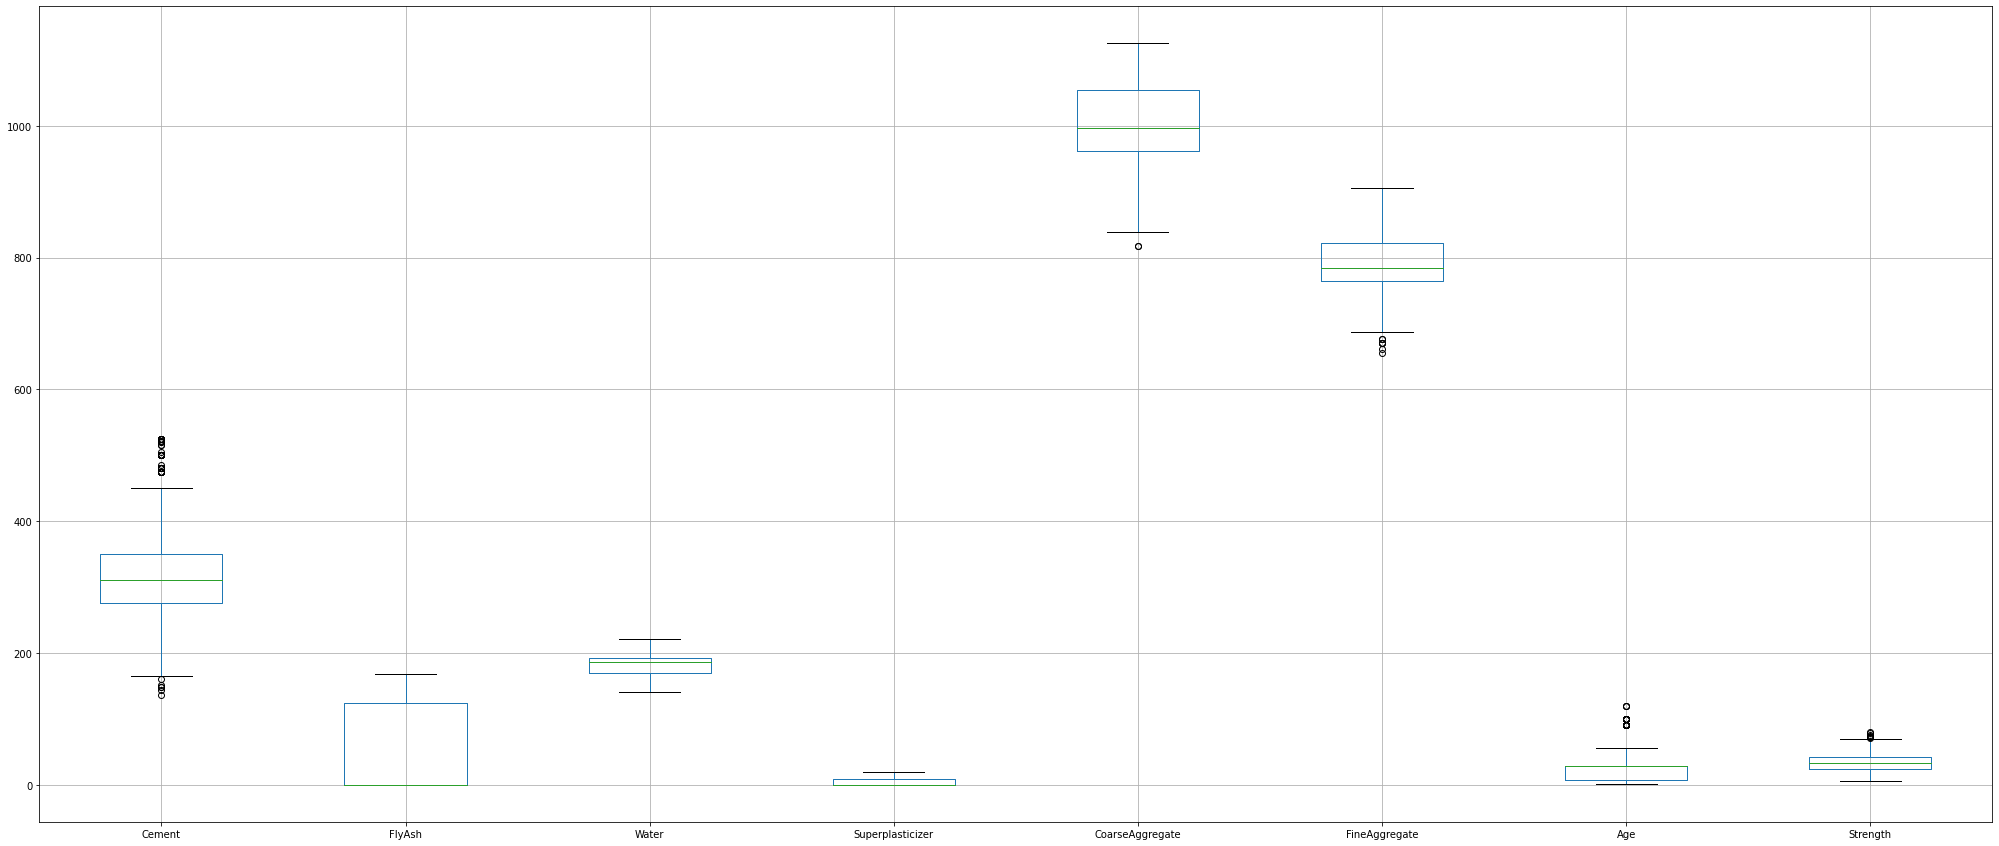

In [ ]:
data_model.boxplot(figsize=(35,15))

**Data Normalization with Robust Scaler**

In [ ]:
X = data_model.drop("Strength", axis=1)
y = data_model[["Strength"]]

In [ ]:
rbs = preprocessing.RobustScaler() #robust
scaled_X = rbs.fit_transform(X)
scaled_Xdf = pd.DataFrame(scaled_X, columns = X.columns)

scaled_data = pd.concat([scaled_Xdf, y], axis=1, join="inner")
scaled_data.head()

,Cement,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,-1.667891,0.815752,-0.867196,0.797872,0.108895,2.109470,2.952381,38.28
1,-1.868158,1.023910,-1.098751,0.829787,1.010243,0.251955,-1.190476,17.11
2,-1.734646,1.023910,-0.903519,0.829787,1.010243,0.253692,-0.666667,23.34
3,-2.001669,1.023910,-1.085131,0.829787,1.010243,0.347524,0.000000,27.41
4,-0.914887,1.009443,-0.077185,0.606383,0.660916,-0.081668,-0.666667,21.91


In [ ]:
scaled_data.isnull().sum()

Cement              0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Strength            0
dtype: int64

**Feature Engineering / Train-Test Split**

In [ ]:
X = scaled_data.iloc[:,:-1]  #features 
y = scaled_data.iloc[:,-1]   #target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

**Models**

Random Forest

In [ ]:
#Evaluate method for error values and r2 value
def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

In [ ]:
#dataframe for model results
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score"])

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2}
models = models.append(new_row, ignore_index=True)

MAE: 4.616799362901861
MSE: 41.979097282409334
r2 Score: 0.7969882324658034


# Hyperparameter tuning and model

In [ ]:
'''
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

rf_model = RandomForestRegressor()

rf_params = {"n_estimators"      : [20, 50, 100],
             "min_samples_split" : np.arange(2,10),
             "min_samples_leaf"  : np.arange(2,10),
             "max_features"      : np.arange(2,6),
             "max_depth"         : [5,10,15]}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)'''



'\nfrom sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold\n\nrf_model = RandomForestRegressor()\n\nrf_params = {"n_estimators"      : [20, 50, 100],\n             "min_samples_split" : np.arange(2,10),\n             "min_samples_leaf"  : np.arange(2,10),\n             "max_features"      : np.arange(2,6),\n             "max_depth"         : [5,10,15]}\n\n#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)\ngrid_search = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,y_train)'

In [ ]:
#grid_search.best_params_

In [ ]:
#rf_tuned = RandomForestRegressor(**grid_search.best_params_).fit(X_train,y_train)
rf_tuned = RandomForestRegressor(max_depth= 10,max_features= 4,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 50).fit(X_train,y_train)

In [ ]:
predictions = rf_tuned.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

MAE: 4.530057747435258
MSE: 40.737017331565625
r2 Score: 0.8029949563489591


In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 195 kB 8.5 MB/s 
     |████████████████████████████████| 2.0 MB 41.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from flaml import AutoML

In [ ]:
automl = AutoML()
automl_settings = {"metric":"r2",
                   "task":"regression"}
automl.fit(X_train, y_train, **automl_settings)

[flaml.automl: 06-08 20:24:09] {2376} INFO - task = regression
[flaml.automl: 06-08 20:24:09] {2378} INFO - Data split method: uniform
[flaml.automl: 06-08 20:24:09] {2382} INFO - Evaluation method: holdout
[flaml.automl: 06-08 20:24:09] {2451} INFO - Minimizing error metric: 1-r2
[flaml.automl: 06-08 20:24:09] {2500} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 06-08 20:24:09] {2591} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 06-08 20:24:09] {2883} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-08 20:24:12] {3014} INFO - Estimated sufficient time budget=29619s. Estimated necessary time budget=209s.
[flaml.automl: 06-08 20:24:12] {3066} INFO -  at 3.0s,	estimator lgbm's best error=0.1619,	best estimator lgbm's best error=0.1619

In [ ]:
automl.model.estimator

XGBRegressor(colsample_bylevel=1.0, colsample_bytree=0.8826299329274134,
             learning_rate=0.0010837437950202355, max_depth=11,
             min_child_weight=6.468007279782032, n_estimators=19722, n_jobs=-1,
             reg_alpha=0.23887161121959208, reg_lambda=15.163773888208217,
             subsample=0.49509562408032115, use_label_encoder=False,
             verbosity=0)

In [ ]:
predictions = automl.predict(X_test)

In [ ]:
mae, mse, r2 = evaluate(y_test, predictions)
#rmse = rmse_cv(automl)

In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

MAE: 4.2661632812774934
MSE: 35.776251665037854
r2 Score: 0.826985319922279


Experimetal Results

In [ ]:
df_exp = pd.read_csv('/content/drive/MyDrive/CapstoneDeney.csv',delimiter=";")
df_exp.head()

,Cement,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,380,0,228,0,932,670,7,15.78
1,380,0,228,0,932,670,14,25.77
2,380,0,228,0,932,670,28,29.54
3,500,0,200,3,1120,613,7,39.60
4,500,0,200,3,1120,613,14,42.67


In [ ]:
X = df_exp.drop("Strength", axis=1)
y = df_exp[["Strength"]]

In [ ]:
rbs = preprocessing.RobustScaler() #robust
scaled_X = rbs.fit_transform(X)
scaled_Xdf = pd.DataFrame(scaled_X, columns = X.columns)

scaled_data = pd.concat([scaled_Xdf, y], axis=1)
scaled_data.head()

,Cement,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,-0.380952,0.0,0.826087,-0.375,-0.309751,-0.371212,-0.333333,15.78
1,-0.380952,0.0,0.826087,-0.375,-0.309751,-0.371212,0.000000,25.77
2,-0.380952,0.0,0.826087,-0.375,-0.309751,-0.371212,0.666667,29.54
3,1.251701,0.0,-0.391304,0.375,1.128107,-1.234848,-0.333333,39.60
4,1.251701,0.0,-0.391304,0.375,1.128107,-1.234848,0.000000,42.67


In [ ]:
X_deney = df_exp.iloc[:,:7]  #features 
y_deney = df_exp.iloc[:,7]   #target
X_deney.head()

,Cement,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,380,0,228,0,932,670,7
1,380,0,228,0,932,670,14
2,380,0,228,0,932,670,28
3,500,0,200,3,1120,613,7
4,500,0,200,3,1120,613,14


In [ ]:
automl.model.estimator

XGBRegressor(colsample_bylevel=1.0, colsample_bytree=0.8826299329274134,
             learning_rate=0.0010837437950202355, max_depth=11,
             min_child_weight=6.468007279782032, n_estimators=19722, n_jobs=-1,
             reg_alpha=0.23887161121959208, reg_lambda=15.163773888208217,
             subsample=0.49509562408032115, use_label_encoder=False,
             verbosity=0)

In [ ]:
predictions = rf_tuned.predict(X_deney)

mae, mse, r2 = evaluate(y_deney, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

MAE: 19.68726142857142
MSE: 483.8667589294048
r2 Score: -4.264860217600572


In [ ]:
predictions = automl.predict(X_deney)
mae, mse, r2 = evaluate(y_deney, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

MAE: 10.462808329264325
MSE: 169.9232270411774
r2 Score: -0.8489016275365346
